# Data generation for Material Network

In [1]:
from IPython.core.display import display, HTML
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity='all'
display(HTML("<style>.container { width:90% !important; }</style>"))

In [12]:
most_occuring_env = {'S:1' : 'Single_neighbor', 'L:2': 'Linear', 'A:2': 'Angular', 'TL:3' : 'Trigonal_plane',
 
                     'TY:3' : 'Trigonal_non-coplanar', 'TS:3': 'T-shaped', 'T:4' : 'Tetrahedron', 'S:4': 'Square_plane','SY:4' :'Square_non-coplanar', 'SS:4': 'See-Saw',  'PP:5':'Pentagonal_plane',
                     
                     'S:5':'Square_pyramid', 'T:5' : 'Trigonal_bipyramid', 'O:6': 'Octahedral', 'T:6': 'Trigonal_prism',  'PP:6' :'Pentagonal_pyramid', 'PB:7':'Pentagonal_bipyramid' , 'ST:7': 'Square_faced_capped_TP', 
                     
                     'ET:7': 'End_trigonal_faced_capped_TP', 'FO:7':'Faced_capped_octahedron', 'C:8':'Cube', 'SA:8':'Square_antiprism', 'SBT:8': 'Square-face_bicapped_TP', 
                     
                     'TBT:8': 'Triangular-face_bicapped_TP', 'DD:8': 'Dodecahedron_WTF', 'DDPN:8': 'Dodcahedron_WTF_p2345',  'HB:8': 'Hexagonal_bipyramid', 'BO_1:8':'Bicapped_octahedron', 
                     
                     'BO_2:8':'Bicapped_oct_OAC', 'BO_3:8': 'Bicapped_oct_OEC', 'TC:9': 'Triangular_cupola', 'TT_1:9': 'Tricapped_TP_TSF', 'TT_2:9': 'T_TP_TSF', 'TT_3:9': 'T_TP_OSF', 'HD:9': 'Heptagonal_dipyramid', 'TI:9':'TI9', 'SMA:9': 'SMA9',
                    
                     'SS:9': 'SS9', 'TO_1:9': 'TO19', 'TO_2:9':'TO29', 'TO_3:9': 'TO3_9',  'PP:10' :'Pentagonal_prism','PA:10': 'Pentagonal_antiprism',   'SBSA:10': 'S-fBSA', 'MI:10': 'MI', 'S:10': 'S10', 'H:10': 'Hexadec', 
                    
                     'BS_1:10': 'BCSP_of', 'BS_2:10': 'BCSP_af', 'TBSA:10': 'TBSA',
                     
                     'PCPA:11': 'PCPA', 'H:11': 'HDech', 'SH:11': 'SPHend', 'CO:11': 'Cs-oct', 'DI:11': 'Dimmi_icso', 'I:12' :'ICOSh', 'PBP:12': 'PBP12',
                    
                     'TT:12': 'TT',    'C:12': 'Cuboctahedral', 'AC:12': 'ANTICUBOOCT', 'SC:12': 'SQU_cupola', 'S:12': 'Sphenemogena', 'HP:12': 'Hexagonal_prism', 'HA:12': 'Hexagonal_anti_prism',
                    
                     'SH:13': 'SH13'}

motif_type_numbering = {'Single_neighbor':1, 'Linear':2, 'Angular':3, 'Trigonal_plane':4,
 
                        'Trigonal_non-coplanar':5, 'T-shaped':6, 'Tetrahedron':7, 'Square_plane':8,
                     
                        'Square_non-coplanar':9, 'See-Saw':10,  'Pentagonal_plane':11,
                     
                        'Square_pyramid':12, 'Trigonal_bipyramid':13, 'Octahedral':14, 'Trigonal_prism':15,
                     
                        'Pentagonal_pyramid':16, 'Pentagonal_bipyramid':17 , 'Square_faced_capped_TP':18, 
                     
                        'End_trigonal_faced_capped_TP':19, 'Faced_capped_octahedron':20, 'Cube':21, 'Square_antiprism':22,
                     
                        'Square-face_bicapped_TP':23, 
                     
                        'Triangular-face_bicapped_TP':24, 'Dodecahedron_WTF':25, 'Dodcahedron_WTF_p2345':26,  'Hexagonal_bipyramid':27, 'Bicapped_octahedron':28, 
                     
                        'Bicapped_oct_OAC':29, 'Bicapped_oct_OEC':30, 'Triangular_cupola':31, 'Tricapped_TP_TSF':32, 'T_TP_TSF':33, 'T_TP_OSF':34, 
                     
                        'Heptagonal_dipyramid':35, 'TI9':36, 'SMA9':37,
                    
                        'SS9':38, 'TO19':39, 'TO29':40, 'TO3_9':41,  'Pentagonal_prism':42,'Pentagonal_antiprism':43,   
                     
                        'S-fBSA':44, 'MI':45, 'S10':46, 'Hexadec':47, 
                    
                        'BCSP_of':48, 'BCSP_af':49, 'TBSA':50,
                     
                        'PCPA':51, 'HDech':52, 'SPHend':53, 'Cs-oct':54, 'Dimmi_icso':55, 'ICOSh':56, 'PBP12':57,
                    
                        'TT':58,    'Cuboctahedral':59, 'ANTICUBOOCT':60, 'SQU_cupola':61, 'Sphenemogena':62, 'Hexagonal_prism':63, 'Hexagonal_anti_prism':64,
                    
                        'SH13':65}

In [13]:
import logging
import time
import os
from pymatgen.analysis.chemenv.coordination_environments.chemenv_strategies import SimplestChemenvStrategy, MultiWeightsChemenvStrategy
from pymatgen.analysis.chemenv.coordination_environments.structure_environments import LightStructureEnvironments
from robocrys.condense.fingerprint import get_site_fingerprints, get_structure_fingerprint, get_fingerprint_distance

from pymatgen import Structure
from pymatgen.io.vasp import Poscar
import pandas as pd
from pymatgen.analysis.chemenv.coordination_environments.coordination_geometry_finder import LocalGeometryFinder
import numpy as np
from collections import Counter
from pymatgen.core.composition import Composition


from pymatgen.analysis.local_env import CrystalNN
from robocrys.condense.site import SiteAnalyzer
from collections import defaultdict


lgf = LocalGeometryFinder()
strategy = SimplestChemenvStrategy(distance_cutoff=1.4, angle_cutoff=0.3 , additional_condition =3)

class Genrating_features(object):
    
    '''
    Directly pass cif structure to get various features related to motif
    '''
    
    def __init__(self, structure_cif):
        
               
        '''
                Args:
            structure: pymatgen.core.structure
        '''
        
        self.comp = structure_cif.split(".")[0]
        
        self.structure = Structure.from_file(structure_cif)
        
        
        self.anion = self.structure.species[-1]
        
        self.elements = [self.structure.sites[i].species_string for i in range(self.structure.num_sites)]
        
        self.element_remove = [unwanted_motif for unwanted_motif in self.elements if unwanted_motif.startswith(str(self.anion))]

        self.final_elem_list = self.elements[0: -len(self.element_remove)]
        
        lgf.setup_structure(structure=self.structure)
        
        self.structure_environments = lgf.compute_structure_environments(maximum_distance_factor=1.41,only_cations=True, excluded_atoms=['O'])
        
        self.light_structure_environments =  LightStructureEnvironments.from_structure_environments(strategy=strategy, structure_environments=self.structure_environments)


        

    #structure fingerprint
    def get_structure_finger_print(self):
        
        structure_finger_print = get_structure_fingerprint(self.structure)
        
        return structure_finger_print
    
    def get_composition_from_structure(self):
        
        return self.structure.composition
    
    def get_types_of_species(self):
        
        return self.structure.types_of_specie
    
    
    def get_site_finger_print(self):
        
        '''
        Get the site finger print for each atom site as a motif
        '''
        
        each_motif_site_print = []
        
        for site in range(len(self.final_elem_list)):
            
            motif_site_print = get_site_fingerprints(self.structure)[site]
            
            '''
            as_dict = false will return the array, we should use this to get site_prints
            '''
            
            site_print = [v for k, v in motif_site_print.items()]
            
            each_motif_site_print.append(site_print)
            
        average_finger_print = [i for i in map(np.average, zip(*each_motif_site_print))]
            
        return each_motif_site_print
    
    
    def get_motif_type_GH_approach1(self):
        
        motif_type_list = []
    
        coordination_env_list = []
    
        for i in range(self.structure.num_sites):
            
            y = self.light_structure_environments.coordination_environments[i]
            
            coordination_env_list.append(y)

        for i in range(len(coordination_env_list)):
            
            if coordination_env_list[i] == None: continue
                
            else:
                
                result = min(coordination_env_list[i], key=lambda x: x['csm'])
                
                if result['ce_symbol'] in most_occuring_env.keys():
                    
                    motif_type = most_occuring_env[result['ce_symbol']] 
                    
                    motif_type_list.append(motif_type)
                    
        return self.structure_environments, motif_type_list
    
    
    def vectorize_composition(self, composition):
        
        vectorize_composition = np.zeros(95)
        
        for element in Composition(composition):
            
            vectorize_composition[element.Z-1] =1

        comp = Composition(composition)
        
        number_of_atoms_in_composition = comp.num_atoms
        
        average_electronegativity = comp.average_electroneg
        
        number_of_different_elements_in_comp = comp.to_data_dict["nelements"]
        
        atomic_weights_in_comp = [comp.elements[i].Z for i in range(len(comp.elements))]

        return vectorize_composition #, number_of_atoms_in_composition, average_electronegativity, number_of_different_elements_in_comp, atomic_weights_in_comp

        
#     #returns vectorized composition
    
    def get_composition(self):
        
        '''
        Changes composition to one hot representation on the basis of atomic number
        Example: MnO6 will get vector with 1 at 8 and 25 and all other 0 with total lenght 95 described in vectorize composition
        '''
        
        structure_environments, new_list = self.get_motif_type_GH_approach1()
        
        strategy.set_structure_environments(structure_environments)
        
        final_elem_list_range = len(new_list)
        
        oxygen_sites = []
        
        neighbor_finding = []
        
        central_atom1 = []

        for elem in range(final_elem_list_range):

            site = self.structure[elem]
            
            central_atom1.append(site.species_string)

            surrounding_oxygen = strategy.get_site_neighbors(site)

            surrounding_atoms = [i.species_string for i in surrounding_oxygen]
            
            neighbor_finding.append(surrounding_atoms)

        neighbor_finding = [sorted(i) for i in neighbor_finding]   
        
        final_key_list = [str(i) + ''.join('%s%d' % t for t in Counter(j).items()) for i, j in zip(central_atom1, neighbor_finding)]
        
        composition_vector_one_hot_dict = {}

        #considering all compositions with labelled numbers    
        for i in range(len(final_key_list)):
            
            composition_vector_one_hot_dict[final_key_list[i]+"_"+str(i)] = self.vectorize_composition(final_key_list[i])  
            
        return composition_vector_one_hot_dict  
    
    def get_connection_type(self):
        
        '''
        Neighboring connection of motifs
        '''
        
        connection_graph = defaultdict(dict)
        
        bonded_structure = CrystalNN().get_bonded_structure(self.structure)
        
        for i in range(len(self.final_elem_list)):
            
            connection_list = []
            
            next_near_neighbors = SiteAnalyzer(bonded_structure).get_next_nearest_neighbors(i)
            
            for k in range(len(next_near_neighbors)):
                
                connection = next_near_neighbors[k]['connectivity']
                
                if connection == 'corner':
                    
                    connection_list.append(1)
                    
                elif connection == 'edge':
                    
                    connection_list.append(2)
                    
                else:
                    
                    connection_list.append(3)
                    
            connection_graph[self.final_elem_list[i]+str(i)] = connection_list
            
        return connection_graph

    # #motif type and final dictionary with various properties
    not_worked = open("network_not_worked.txt", "w")

    def get_motif_type_GH_approach(self):

        try:

            new_list = []

            comp_motif = {}

            result1 = []

            for i in range(self.structure.num_sites):

              #  print(lse.coordination_environments[i])
                y = self.light_structure_environments.coordination_environments[i]

                result1.append(y)

            for i in range(len(result1)):

                if result1[i] == None: continue

                else:

                    result = min(result1[i], key=lambda x: x['csm'])

                    if result['ce_symbol'] in most_occuring_env.keys():

                        motif_type = most_occuring_env[result['ce_symbol']] 

                        new_list.append(motif_type)

                        #comp_motif[header.split(".cif")[0], motif_type]

            comp_motif[self.comp] = new_list

            comp_motif['motif_type'] = new_list

            comp_motif['structure_finger_print']= self.get_structure_finger_print()

            comp_motif['site_finger_print'] = self.get_site_finger_print()

            comp_motif['compositions'] = self.get_composition()

            comp_motif['connection_type'] = self.get_connection_type()

            return comp_motif

        except:
            not_worked.write(str(header)+"\n")

        return comp_motif
    

#generate feature vector for one compound

Genrating_features("Mn2V2O7_mp-19142_primitive.cif").get_motif_type_GH_approach()
        


If you use the ChemEnv tool for your research, please consider citing the following reference(s) :
David Waroquiers, Xavier Gonze, Gian-Marco Rignanese, Cathrin Welker-Nieuwoudt, Frank Rosowski,
Michael Goebel, Stephan Schenk, Peter Degelmann, Rute Andre, Robert Glaum, and Geoffroy Hautier,
"Statistical analysis of coordination environments in oxides",
Chem. Mater., 2017, 29 (19), pp 8346-8360,
DOI: 10.1021/acs.chemmater.7b02766



/Users/Hemanta/anaconda3/lib/python3.7/site-packages/pymatgen/analysis/local_env.py:3419: UserWarning:

CrystalNN: distance cutoffs set but no oxidation states specified on sites! For better results, set the site oxidation states in the structure.

/Users/Hemanta/anaconda3/lib/python3.7/site-packages/pymatgen/analysis/local_env.py:3232: UserWarning:

CrystalNN: cannot locate an appropriate radius, covalent or atomic radii will be used, this can lead to non-optimal results.



{'Mn2V2O7_mp-19142_primitive': ['Octahedral',
  'Octahedral',
  'Trigonal_bipyramid',
  'Trigonal_bipyramid'],
 'motif_type': ['Octahedral',
  'Octahedral',
  'Trigonal_bipyramid',
  'Trigonal_bipyramid'],
 'structure_finger_print': array([0.11123194, 0.10221716, 0.11123194, 0.10221716, 0.13853475,
        0.27657361, 0.00360423, 0.00712951, 0.00721772, 0.00994472,
        0.01804735, 0.01748785, 0.04193363, 0.04649457, 0.09697877,
        0.28566608, 0.29941262, 0.31233841, 0.16431024, 0.16501204,
        0.1555442 , 0.17662478, 0.0934113 , 0.09455187, 0.19205272,
        0.2359705 , 0.06957892, 0.08669339, 0.10836175, 0.14544605,
        0.07557701, 0.12163463, 0.13056101, 0.16786829, 0.13157177,
        0.16949269, 0.09133819, 0.19375755, 0.02888179, 0.06126752,
        0.03202748, 0.06794055, 0.06151878, 0.13050104, 0.16742978,
        0.3551722 , 0.04806246, 0.10195587, 0.07080668, 0.15020365,
        0.08459828, 0.17946005, 0.        , 0.        , 0.        ,
        0.        , 

# Parallel processing for many compounds

In [ ]:
from multiprocessing import Pool
from monty.serialization import dumpfn


f = open("file_data.dat", "r")
compound_list = []
for lines in f:
    compound = lines.split()[0]
    compound_list.append(compound)
    
#dump the data file 

final_data = "resulting_data_file"

if __name__ == '__main__':
    max_number_process = 40
    
    p = Pool(max_number_process)
    
    result = p.map(get_connection_graph, list_compounds)
    
    dumpfn(result, resulting_data_file)
    
    p.close()
    
    p.join()
print("Time taken is", time.time()-start_time)

# Analyze the data

In [1]:
#load the data
import pandas as pd

import numpy as np

import os

from monty.serialization import loadfn

import networkx as nx

import random

#data = loadfn("resulting_data_file")
#I am using 108 transparent conducting dataset for data analysis process as provided in the file TC_oxides_data

data = loadfn("TC_oxides_data")

In [2]:
#make one hot representation of motif types
def vectorize(motif):
    vector = np.zeros(len(motif_type_numbering)+1)
    for keys in motif_type_numbering.keys():
        if keys == motif:
            vector[motif_type_numbering[str(keys)]-1] = 1
    return vector

#make vector representation for composition in terms of fraction of element present

def naiveVectorize(composition):
    #vector = np.zeros((MAX_Z))
    vector = np.zeros(95)
    composition = Composition(composition)
    for element in composition:
        fraction = composition.get_atomic_fraction(element)
        vector[element.Z - 1] = fraction
    return vector

#get euclidean distance between two vectors
def euclidian_distance(v1, v2):
    return sum((p-q)**2 for p, q in zip(v1, v2))**0.5


In [7]:
def get_unique_composition():
    '''
    returns count of different motif composition present in the data
    '''
    unique_comp_count ={}
    for i in range(len(data)):
        if data[i]==None:continue
        comp = set([j.split("_")[0] for j in data[i]['compositions'].keys()])
        for k in comp:
            if k not in unique_comp_count:
                unique_comp_count[k] =1
            else:
                 unique_comp_count[k] +=1

    #make a plot for motifs
#     import matplotlib.pyplot as plt
#     plt.bar(list(unique_comp_count.keys()), unique_comp_count.values())
#     plt.show()
    
    #sort it with values
    sorted_dict = {k:v for k, v in sorted(unique_comp_count.items(), key=lambda item:item[1], reverse=True)}
    
    return sorted_dict
get_unique_composition()

{'GeO6': 9,
 'SbO6': 9,
 'InO6': 8,
 'GaO6': 8,
 'SnO6': 7,
 'CdO6': 7,
 'ZnO4': 6,
 'GeO4': 5,
 'ZnO6': 4,
 'TeO6': 4,
 'CdO8': 4,
 'MnO6': 3,
 'CdO4': 3,
 'TiO5': 3,
 'TiO6': 3,
 'NaO6': 3,
 'SnO3': 3,
 'BiO12': 3,
 'TlO6': 2,
 'TlO3': 2,
 'PtO6': 2,
 'GaO4': 2,
 'MgO4': 2,
 'HgO3': 2,
 'PO4': 2,
 'CdO7': 2,
 'AsO6': 2,
 'NbO6': 2,
 'InO7': 2,
 'SiO6': 2,
 'MnO4': 2,
 'NaO4': 2,
 'SiO4': 2,
 'KO6': 2,
 'WO6': 2,
 'TlO5': 1,
 'CrO6': 1,
 'ScO7': 1,
 'GaO8': 1,
 'BO1': 1,
 'SiO8': 1,
 'CoO6': 1,
 'PbO7': 1,
 'ZrO6': 1,
 'SO7Zr4': 1,
 'ZrO3S4': 1,
 'SrO2P4': 1,
 'PSr9': 1,
 'SrO1P5': 1,
 'CaAs4O2': 1,
 'CaAs5O1': 1,
 'AsCa9': 1,
 'SO4': 1,
 'KO5': 1,
 'AlO4': 1,
 'TlO4': 1,
 'CoO5': 1,
 'CaO5': 1,
 'MgO5': 1,
 'LiO6': 1,
 'HgO6': 1,
 'SrI1O1': 1,
 'SrO1': 1,
 'ISr4': 1,
 'IO1Sr6': 1,
 'HgO2': 1,
 'ClHg8': 1,
 'HgO4': 1,
 'YO7': 1,
 'AgO2': 1,
 'PbO4': 1,
 'SbO4': 1,
 'SbO3': 1,
 'ClO3Sb6': 1,
 'IO3': 1,
 'KO10': 1,
 'KO9': 1,
 'KO12': 1,
 'SbO3S1': 1,
 'SSb3': 1,
 'SO2Sb3': 1,
 'SbS5': 

In [ ]:
#if some of them are missing composition then clean  the data for further processing
#check the length of data
len(data)

for key in enumerate(data):
    if 'compositions' not in list(key[1].keys()):
        data.remove(key[1])

#check the length of data
len(data)

# Store all data in terms of key value pair for further analysis


In [14]:

def get_formatted_data():
    motif_type_dict = defaultdict(dict)
    for i in range(len(data)):
        if data[i] == None:continue
        if 'compositions' not in data[i]: continue
            
        motif_type_dict[list(data[i].keys())[0]]['compositions']= data[i]['compositions']
        motif_type_dict[list(data[i].keys())[0]]['motif_types']= list(data[i].values())[0]
        motif_type_dict[list(data[i].keys())[0]]['one_hot_motif_types'] = [vectorize(i) for i in list(data[i].values())[0]]
        motif_type_dict[list(data[i].keys())[0]]['site_finger_print']= data[i]['site_finger_print']
        
        #motif_type_dict[list(data[i].keys())[0]]['connection_type_vec']= data[i]['connection_type']
        
        #if you want composition fraction turn the next line on

        #motif_type_dict[list(data[i].keys())[0]]['composition_fraction'] = [dict(Composition(i.split("_")[0]).fractional_composition.get_el_amt_dict()) 
        #                                                                    for i in list(data[i]['compositions'].keys())]
        #motif_type_dict[list(data[i].keys())[0]]['composition_fraction'] =  [naiveVectorize(Composition(i.split("_")[0])) for i in list(data[i]['compositions'].keys())]
    
    return motif_type_dict

motif_type_dict = get_formatted_data()

# Collect motif types in each compound and store in pandas dataframe

In [15]:
from collections import defaultdict
import re
def print_motif_types(motif_type_dict):
    motifs  =defaultdict(dict)
    motif_type = {}
    compounds_list = list(motif_type_dict.keys())[:-4]
    for compound in compounds_list:
        if compound == None: continue
        composition = [i.split("_")[0] for i in motif_type_dict[compound]['compositions']]
        motif = [i for i in motif_type_dict[compound]['motif_types']]
        
        #mpid = int(re.findall("[0-9]{2,}", header)[0]) #this will be important for Jinbos paper

        motifs[compound] = composition
        motif_type[compound]= motif
    
    return motifs

motif_types = print_motif_types(motif_type_dict)

df = pd.DataFrame.from_dict(motif_types, orient='index')

#save to excel
#df.to_excel("compound_motif_types.xlsx")

# Count the the number of unique motif types present in TC oxides

In [25]:
import matplotlib.pyplot as plt

def count_motif_type_freq():
    motif_count={}
    for m in range(len(list(motif_type_dict.keys()))-4): #there are four numbers at the end of the motif type dict keys so removed them, need to check how they came
        if motif_type_dict[list(motif_type_dict.keys())[m]]==None: continue
        for i in list(motif_type_dict[list(motif_type_dict.keys())[m]]['compositions'].keys()):
            motif = i.split("_")[0]
            if motif not in motif_count.keys():
                motif_count[str(motif)] = 1 
            else:
                 motif_count[str(motif)] += 1
    return motif_count

count_motif = count_motif_type_freq()
sorted_count = {k: v for k, v in sorted(count_motif.items(), key=lambda item: item[1], reverse=True)}

# Truncate the motif frequence and make a plot for motifs and frequency

Text(0.5, 1.0, 'Motif_distribution (only freq>5)')

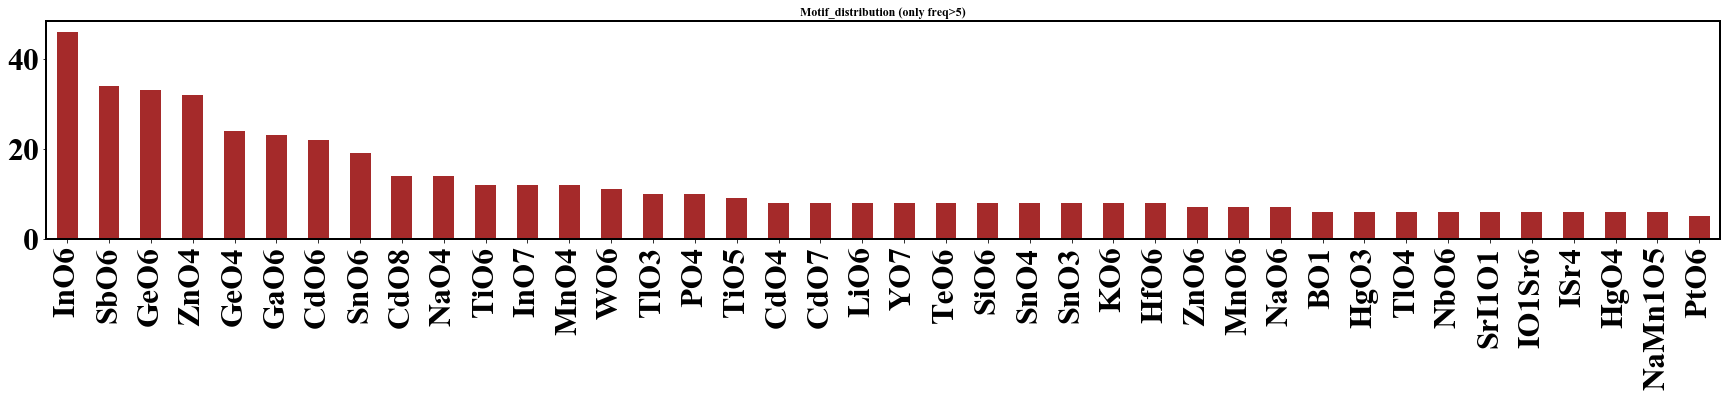

In [26]:
def get_truncated_dict(dictionary, limit_value):
    truncated = {}
    for key, value in dictionary.items():
        if dictionary[key] >= limit_value:
            truncated[key] = value
    return truncated

sorted_count = get_truncated_dict(sorted_count, 5)


%matplotlib inline

# set font
plt.rcParams['font.family'] = 'Times New Roman'

plt.rcParams['axes.linewidth']=2

f, ax = plt.subplots(figsize = (30, 4))
bin = np.arange(len(sorted_count.keys()))

ax.bar(sorted_count.keys(), sorted_count.values(), color='brown', align = "center", width = 0.5);
plt.xticks(rotation='vertical');
ax.xaxis.set_tick_params(labelsize = 32);
ax.yaxis.set_tick_params(labelsize = 32);

plt.xlim(-0.5, bin.size-0.5);

plt.title("Motif_distribution (only freq>5)")

# compute some other crystal features that might be helpful for further analysis

In [28]:
def get_atomic_number_from_composition(composition):
    '''
    This composition is of type 'MnO6-
    ++++++++'
    '''
    atomic_no_list = [element.Z for element in Composition(composition)]
    
    return atomic_no_list

def get_max_atomic_number_From_formula():
    '''
    Get atomic number from header file
    Example: pass mp-19142Mn2V2O7 is one in motif_type dict.keys()
    '''
    atomic_number = []
    import re
    for i in list(motif_type_dict.keys()):
        compound = re.findall('[a-zA-Z]+', i)[1]
        for element in Composition(compound):
            atomic_num = element.Z
            if atomic_num not in atomic_number:
                atomic_number.append(atomic_num)
    return max(atomic_number)

get_max_atomic_number_From_formula()

83

# Construct the material graph based on features generated above, mainly motif based features

# Calculate various similarity measure

In [32]:
import numpy as np
import scipy.spatial.distance as sd

class similarityMeasure:
    
    '''
    Various similarity measure between two vectors
    '''
    
    def __init__(self, v1, v2):
        
        self.firstVector = v1
        self.secondVector = v2
        
        self.dot_product = np.dot(v1, v2)
        
        
        self.denominator = np.linalg.norm(self.firstVector)**2 + np.linalg.norm(self.secondVector)**2 - self.dot_product
        
        if self.denominator ==0:
            #print("denominator is zero, select different vector")
            return None
    
    def calculate_TanimotoCoefficient(self):
        similarity_coeff = self.dot_product / self.denominator
        return similarity_coeff
    
    def calculate_cosineSimilarity(self):
        similarity_coeff = self.dot_product / (np.linalg.norm(self.firstVector)* np.linalg.norm(self.secondVector))
        return similarity_coeff
    
    def calculate_cosine_root_in_zierrman_paper(self):
        cosine_sim = np.sqrt(self.dot_product)
        return cosine_sim
    
    
    
def calculate_euclidean_distance(m_by_n_array):
        '''
        Calculate euclidean distance between list of list in a single form
        ex: list = [[1,2,3], [2,4,5]]
        '''
        distance = sd.pdist(m_by_n_array, metric = 'euclidean')
        return distance

def calculate_gaussian(pass_list):
    
    '''
    Calculate gaussian distribution by calculating mean and standard deviation
    '''
    sigma = np.std(pass_list)
    mu = np.mean(pass_list)
    gauss = [1/(sigma * np.sqrt(2* np.pi)) * np.exp(-(i - mu)**2 / (2* sigma **2)) for i in pass_list]
    return gauss

def calculate_average_between_two_list_of_list(l1, l2):
    '''
    calculate average between two. lists
    '''
    mean_list = []
    for i in range(len(l1)):
        mean = [(x1+y1)/2 for x1, y1 in zip(l1[i], l2[i])]
        mean_list.append(mean)
    return mean
    

# Compute  graph data

In [33]:
from monty.serialization import dumpfn
result_single_list = "complex_oxides_graph_data"
file = open("track_job.txt", "w")
def make_graph_data():
    
    from collections import defaultdict

    final_similarity_vec_dict1 = defaultdict(dict)
    
    for j in range(107):
            compound_1 = list(motif_type_dict.keys())[j]
            
            if 'Os' in compound_1: continue
            if compound_1 == None:continue
            compound_1Composition = [i.split("_")[0] for i in list(motif_type_dict[compound_1]['compositions'].keys())]
            
            for jj in range(j+1,107):
                file.write(str(j)+" "+str(jj) +"\n")

                if j !=jj:

                    if list(motif_type_dict.keys())[jj]==None:continue
                    compound_2 = list(motif_type_dict.keys())[jj]
                    
                    if 'Os' in compound_2:continue
                    if compound_2 == None: continue
                        
                    compound_2Composition = [i.split("_")[0] for i in list(motif_type_dict[compound_2]
                                                                           ['compositions'].keys())]
                    shared_composition = set(compound_1Composition).intersection(set(compound_2Composition))
                    
                      #we do not  have connection type data for TC oxides so I am commenting this here
                      #one can turn this on after generating connection type data as described in above


#                     #Connection type data
                    
#                     compound1_connection_type = motif_type_dict[compound_1]['connection_type_vec']
#                     compound2_connection_type = motif_type_dict[compound_2]['connection_type_vec']

#                     #get the normalize vectors for both compounds from compound1 and compound2

#                     c1_vec = vectorize_connections(compound1_connection_type)
#                     c2_vec = vectorize_connections(compound2_connection_type)
                    
                        
                    if len(shared_composition) != 0:
                        
                        feature_concatenated_similarity = []
                        
                        for i in range(len(list(motif_type_dict[compound_1]['compositions'].keys()))):
                            
                            combined_cat = []

                            for k in range(len(list(motif_type_dict[compound_2]['compositions'].keys()))):
                                
                                '''
                                get site fingerprint vectors from the data
                                '''
                                compound_1Site_finger_print = np.asarray(motif_type_dict[compound_1]
                                                                         ['site_finger_print'][i])
                                
                                compound_2Site_finger_print = np.asarray(motif_type_dict[compound_2]
                                                                         ['site_finger_print'][k])
                                                              
                                '''
                                Concatenate site finger prints and connection vectors before computing similarity
                                '''
                                #as we do not have connection type no concatenation is needed
                                
#                                 compound1_combine = np.concatenate((compound_1Site_finger_print, c1_vec[i]), axis = 0)
#                                 compound2_combine = np.concatenate((compound_2Site_finger_print, c2_vec[k]), axis = 0)
                                
                                compound1_combine = compound_1Site_finger_print
                                compound2_combine = compound_2Site_finger_print
                
                                combine_similarity = similarityMeasure(compound1_combine, compound2_combine).calculate_TanimotoCoefficient()
                                combined_cat.append(combine_similarity)
                    

                            '''
                            collect calculated similarity 
                            '''
                            
                            feature_concatenated_similarity.append(combined_cat)
                            
                        #now consider only mean from the lists
                        vect = [np.mean(i) for i in feature_concatenated_similarity]
                        #consider mean only again
                        similar = np.mean(vect)
                        
                        final_similarity_vec_dict1[compound_1][compound_2]=similar

                    else:
                        final_similarity_vec_dict1[compound_1][compound_2] = 0
            
                    
    return final_similarity_vec_dict1

final_similarity_vec_dict1 = make_graph_data()

dumpfn(final_similarity_vec_dict1, result_single_list)

# load the graph data for further analysis

In [90]:
from monty.serialization import loadfn
import pandas as pd
data = loadfn("complex_oxides_graph_data")
df = pd.DataFrame(data).T

In [92]:
new_df = df.stack().reset_index()
new_df.columns = ['source', 'target', 'weight']

G = nx.from_pandas_edgelist(new_df, 'source', 'target', edge_attr=['weight'], create_using=nx.Graph())

#save graph in .graphml file
nx.write_graphml(G, "TC_oxides_graph.graphml")

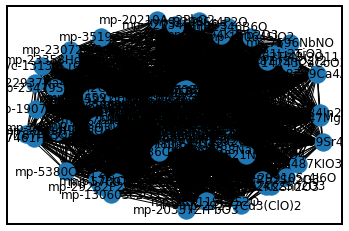

In [93]:
#visualize in networkx
nx.draw_networkx(G)
#we can visualize this  TC_oxides_graph.grahml in Gephi and analyze the result

# We can redefine the weights and make graph  more denser here

In [94]:
#remove edges with weight less than a certain value
edge_weights = nx.get_edge_attributes(G, "weight")
G.remove_edges_from((e for e, w in edge_weights.items() if w<=0.3))
edge_attribute = nx.get_edge_attributes(G, "weight")

# Assign weights manually in the graph

In [95]:
for u, v, d in G.edges(data = True):
    if d["weight"] > 0.75:
        d['weight'] = 1
    elif 0.3<d["weight"]<=0.75:
        d["weight"] = 0.5
        
#save graph with new weights
nx.write_graphml(G, "weight_assigned_graph.graphml")

# We can start analyzing graph using networkx

In [104]:
#density
nx.density(G)

0.03667783459707283

In [105]:
nx.is_connected(G) #check all nodes are connected or not

False

In [107]:
graph = G
#take the connected components
components = nx.connected_components(graph)
#find the largest component
largest_component = max(components, key = len)

In [108]:
#this is time consuming if you have many nodes
#create a subgraph of largest connected component
subgraph = graph.subgraph(largest_component)
diameter = nx.diameter(subgraph)
print("largest component diameter is", diameter)

largest component diameter is 7


# Degree and top degree nodes

In [110]:
#find degree and use it as a node attribute
degree_dict = dict(graph.degree(graph.nodes()))
nx.set_node_attributes(graph, degree_dict, 'degree')

In [112]:
#top 10 nodes by degree
from operator import itemgetter
sorted_degree = sorted(degree_dict.items(), key=itemgetter(1), reverse=True)
                       
print("Top 20 nodes by degree:")

top_degree_nodes = []
                       
for d in sorted_degree[:10]:
    x1, y1 = d
    top_degree_nodes.append(x1)
    
top_degree_nodes

Top 20 nodes by degree:


['mp-8275CdGeO3',
 'mp-29455Ga4GeO8',
 'mp-8922Cd(SbO3)2',
 'mp-27843Zn2Ge3O8',
 'mp-8285ZnGeO3',
 'mp-5794Zn(GaO2)2',
 'mp-28931Ga2TeO6',
 'mp-29213Cd2Ge7O16',
 'mp-3917Cd2GeO4',
 'mp-7762CdGe2O5']

# Betweeness and eigenvector centrality

In [113]:

betweenness_dict = nx.betweenness_centrality(graph)
eigenvector_dict = nx.eigenvector_centrality(graph)

#assign each attributes to each node in the network
nx.set_node_attributes(graph, betweenness_dict, 'betweenness_centrality')
nx.set_node_attributes(graph, eigenvector_dict, "eigenvector_centrality")

# Identify nodes by sorting betweeness centrality

In [115]:
sorted_betweenness = sorted(betweenness_dict.items(), key=itemgetter(1), reverse=True)
bet_centrality = []
print("Top 20 nodes by betweenness centrality:")
for b in sorted_betweenness[:20]:
    x, y = b
    #print(x)
    bet_centrality.append(x)
bet_centrality

Top 20 nodes by betweenness centrality:


['mp-14243Cd3TeO6',
 'mp-8922Cd(SbO3)2',
 'mp-8285ZnGeO3',
 'mp-29455Ga4GeO8',
 'mp-28931Ga2TeO6',
 'mp-20011NaSbO3',
 'mp-13334ZnSnO3',
 'mp-5280In2Ge2O7',
 'mp-5966Cd2SnO4',
 'mp-504908In2TeO6',
 'mp-3188Zn(SbO3)2',
 'mp-22189In6TeO12',
 'mp-22979GaBiO3',
 'mp-3917Cd2GeO4',
 'mp-8275CdGeO3',
 'mp-27843Zn2Ge3O8',
 'mp-5909Zn2GeO4',
 'mp-25014MnGeO3',
 'mp-5794Zn(GaO2)2',
 'mp-3744NaNbO2']